# 01. PACOTES


## 01.1 Instalar

In [2]:
install.packages("summarytools")
install.packages("Amelia")
install.packages("janitor")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("DescTools")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘lobstr’, ‘plyr’, ‘reshape2’, ‘checkmate’, ‘magick’, ‘matrixStats’, ‘pander’, ‘pryr’, ‘rapportools’


Warning message in install.packages("summarytools"):
“installation of package ‘magick’ had non-zero exit status”
Warning message in install.packages("summarytools"):
“installation of package ‘summarytools’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies 

## 01.2 Pacotes

In [1]:
library(Amelia) # gerar mapa missing
library(janitor) # gerar tabela cruzadas de frequencia
library(rpart) # calcular arvore de decisão
library(rpart.plot)  # plotar arvore de decisão
library(tidyverse)
library(DescTools)
library(corrplot) #Calcular o crammerV
library(Information) # para calcular o IV
library("mlr") #dummy

ERROR: ignored

# 02. LEITURA DE BASE

In [ ]:
# Versão do programa
R.version.string

[1] "R version 4.2.0 (2022-04-22)"

In [ ]:
# Vizualizar os programas instalados
print(installed.packages())

In [ ]:
database <- read.csv("/german_credit_data.csv")

head(database)

In [ ]:
prop.table(table(database$Risk))


 bad good 
 0.3  0.7 

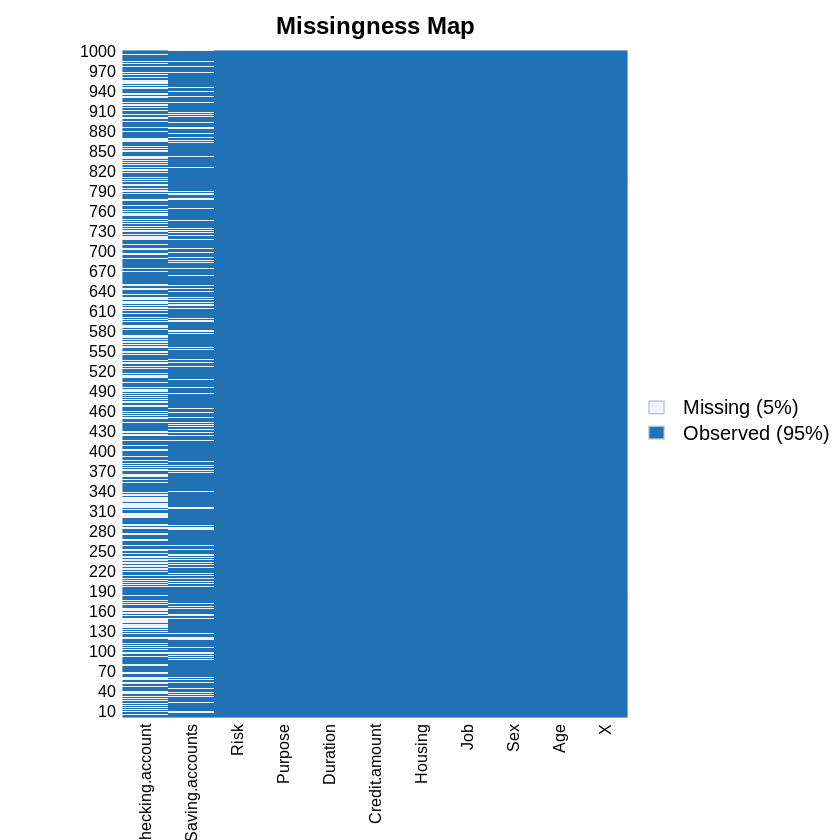

In [ ]:
missmap(database)

In [ ]:
sum(is.na(database$Checking.account)) #soma de dados missing da variável Checking


[1] 394

In [ ]:
sum(is.na(database$Saving.accounts)) #soma de dados missing da variavel Saving

[1] 183

In [ ]:
summary(database)

# 03. ANÁLISE DESCRITIVA

### 03.1 Age

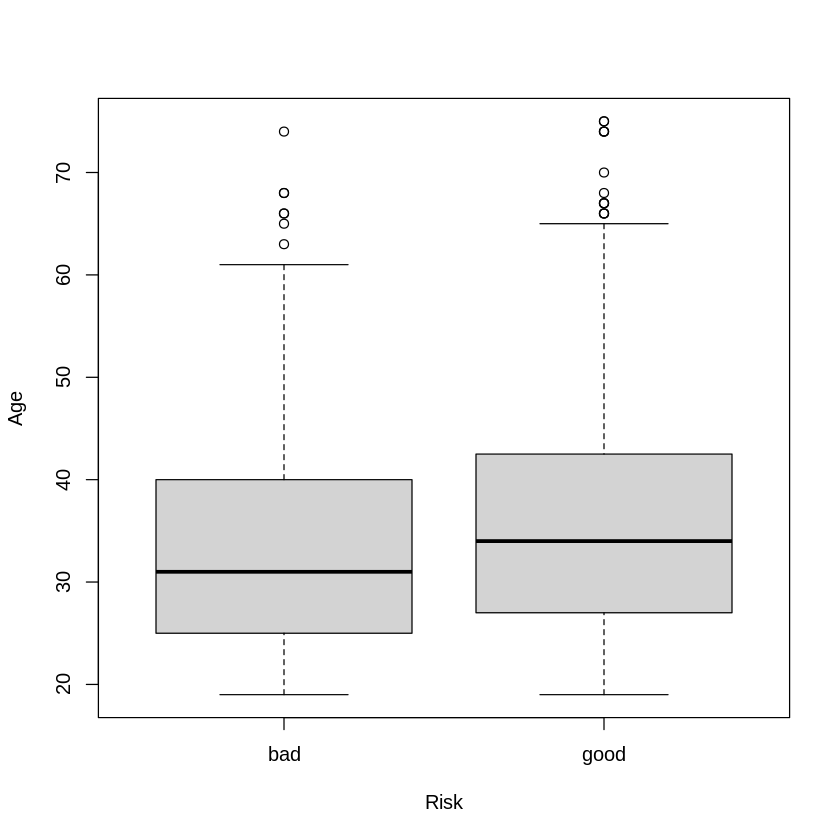

In [ ]:
boxplot(Age~Risk, data = database) 

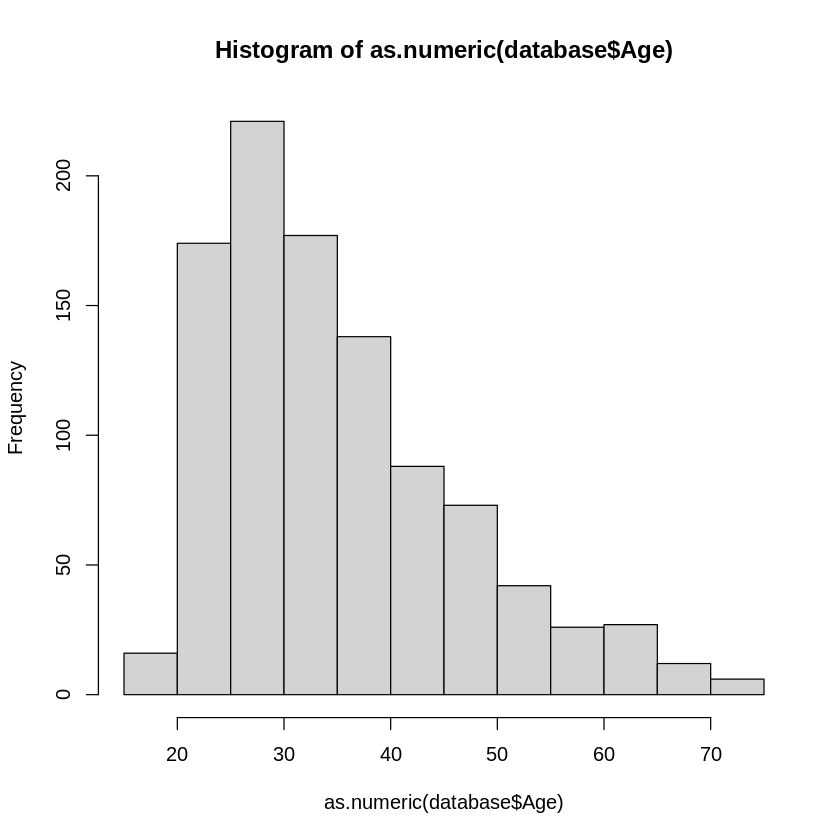

In [ ]:
hist(as.numeric(database$Age)) 

In [ ]:
boxplot(database$Risk,database$Age)

ERROR: ignored

In [ ]:
str(database)

In [ ]:
table(database$Sex, database$Risk)

### 03.2 Job 
0: desempregado/não qualificado - não residente

1: não qualificado - residente

2: funcionário/funcionário qualificado

3: gerência/ autônomo/ funcionário altamente qualificado/diretor

In [ ]:
#Pág 76 (Credit Score)
database %>%
  tabyl(Job, Risk) %>%
  adorn_percentages() %>%
  adorn_pct_formatting()


### 03.3 Housing

1: aluguel

2: próprio

3: de graça

In [ ]:
#Housing e Risk
database %>%
  tabyl(Housing, Risk) %>%
  adorn_percentages() %>%
  adorn_pct_formatting()

### 03.4 Saving account
Conta poupança/títulos

1: 2: 3: 4: 5:

... < 100 DM 100 <=... < 500 DM 500 <= ... < 1000 DM

.. >= 1000 DM

desconhecido/sem conta poupança

In [ ]:
#Saving e Risk
database %>%
  tabyl(Saving.accounts, Risk) %>%
  adorn_percentages() %>%
  adorn_pct_formatting()

### 03.5 Checking.account (Dinheiro na conta corrente)
1: ... < 0 DM

2: 0<=...< 200DM

3: ... >= 200 DM/atribuições salariais por pelo menos 1 ano

4: sem conta corrente

In [ ]:
#Checking.account
database %>%
  tabyl(Checking.account, Risk) %>%
  adorn_percentages() %>%
  adorn_pct_formatting()

### 03.6 Quantidade de Crédito

In [ ]:
#Credit e Risk
boxplot(Credit.amount~Risk, data=database)

In [ ]:
str(database$Risk)

 chr [1:1000] "good" "bad" "good" "good" "bad" "good" "good" "good" "good" ...


### 03.7 Objetivo

0: carro (novo)

1: carro (usado)

2: móveis/equipamentos

3: rádio/televisão

4: eletrodomésticos

5: reparos

6: educação

7: (férias - não existe?) 8: reciclagem

9: negócios

10: outros

In [ ]:
#Purpose e Risk
database %>%
  tabyl(Purpose, Risk) %>%
  adorn_percentages() %>%
  adorn_pct_formatting()

### 03.8 Quantidade de parcelas em meses

In [ ]:
max(database$Duration)

In [ ]:
boxplot(Duration~Risk, data=database)

# 04. AMOSTRAGEM

In [ ]:
database$Default <- ifelse(database$Risk=="bad",1,0)
table(database$Default)


  0   1 
700 300 

In [ ]:
dim(database)

[1] 1000   12

In [ ]:
# Escolhendo semente aleatória
RNGkind(sample.kind ="Rejection")
set.seed(202205)
ind <-sample(x=c(TRUE,FALSE), size=nrow(database),replace=TRUE,prob=c(0.7,0.3))

In [ ]:
DES <- database[ind,]
dim(DES)

[1] 710  12

In [ ]:
VAL <- database[!ind,]
dim(VAL)

[1] 290  12

# 05. CATEGORIZAÇÃO

In [ ]:
colnames(DES)

[1] "X"                "Age"              "Sex"              "Job"             
 [5] "Housing"          "Saving.accounts"  "Checking.account" "Credit.amount"   
 [9] "Duration"         "Purpose"          "Risk"             "Default"

### 05.1 Idade

In [ ]:
tree_idade = rpart(Default ~ Age, data = DES, control = rpart.control(cp = 0.01,minbucket = 0.05*nrow(DES)))
tree_idade

n= 710 

node), split, n, deviance, yval
      * denotes terminal node

1) root 710 149.49860 0.3014085  
  2) Age>=25.5 571 114.28020 0.2767075 *
  3) Age< 25.5 139  33.43885 0.4028777 *

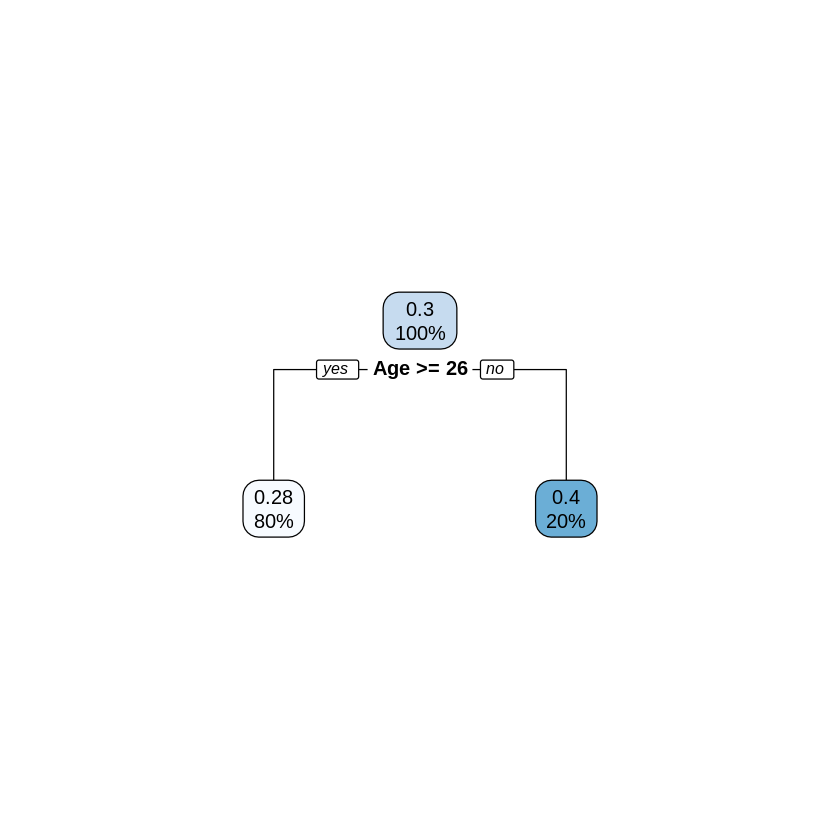

In [ ]:
rpart.plot(tree_idade, roundint = FALSE)

In [ ]:
DES$IDADE_C=DES$Age


In [ ]:
DES$IDADE_C[DES$IDADE_C <26]<-"<26" 
DES$IDADE_C[DES$IDADE_C >=26]<-">=26" 

In [ ]:
table(DES$Age, DES$IDADE_C)

    
     <26 >=26
  19   2    0
  20  11    0
  21  11    0
  22  20    0
  23  36    0
  24  30    0
  25  29    0
  26   0   41
  27   0   29
  28   0   31
  29   0   22
  30   0   27
  31   0   28
  32   0   24
  33   0   21
  34   0   25
  35   0   28
  36   0   24
  37   0   18
  38   0   16
  39   0   17
  40   0   17
  41   0   12
  42   0   18
  43   0   12
  44   0   13
  45   0   14
  46   0   14
  47   0   13
  48   0    7
  49   0    8
  50   0    6
  51   0    7
  52   0    6
  53   0    6
  54   0    7
  55   0    4
  56   0    2
  57   0    8
  58   0    4
  59   0    2
  60   0    6
  61   0    6
  62   0    2
  63   0    7
  64   0    3
  65   0    4
  66   0    4
  67   0    2
  68   0    1
  74   0    3
  75   0    2

## 05.2 Genero

In [3]:
DES$GENERO_C <- DES$Sex

ERROR: ignored

## 05.3 Job

 0: desempregado/não qualificado - não residente

1: não qualificado - residente

2: funcionário/funcionário qualificado

3: gerência/ autônomo/ funcionário altamente qualificado/*diretor*

In [ ]:
DES$Job <- as.character(DES$Job)
str(DES$Job)

 chr [1:710] "2" "1" "2" "2" "2" "3" "1" "3" "2" "1" "2" "2" "2" "2" "2" ...


In [ ]:
tree_job = rpart(Default ~ Job, data = DES, control = rpart.control(cp = 0.01,minbucket = 0.05*nrow(DES)))
tree_job

n= 710 

node), split, n, deviance, yval
      * denotes terminal node

1) root 710 149.4986 0.3014085 *

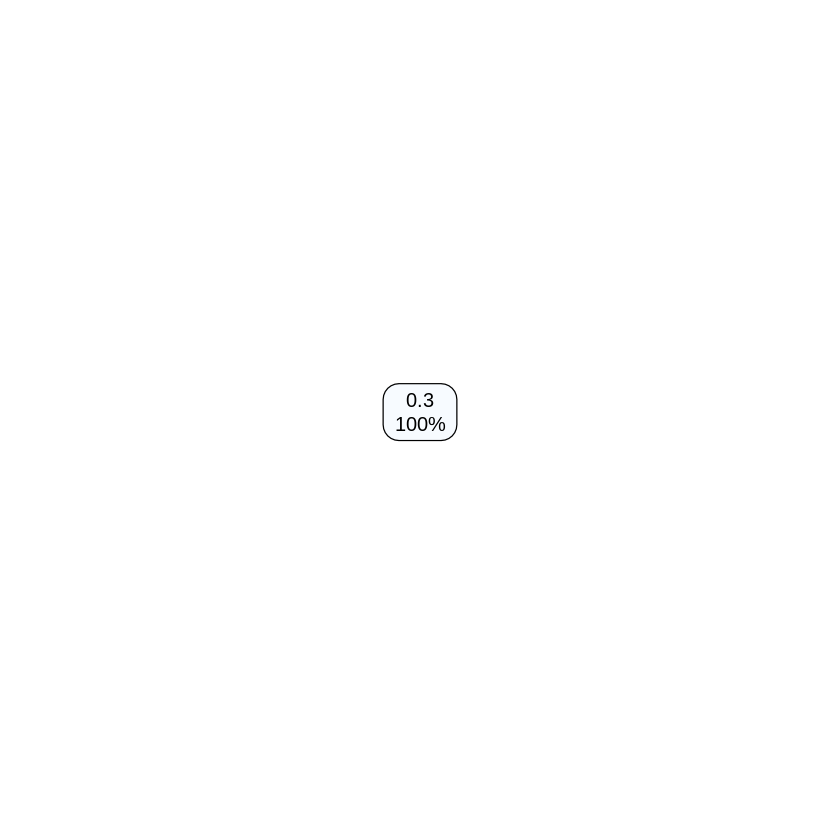

In [ ]:
rpart.plot(tree_job, roundint = FALSE)

Variável foi removida por não fazer sentido no contexto de negócio onde a maior probabilidade de inadiplencia se encontra nas categorias de desempregado e alta qualificação

## 

## 05.4 Housing

In [ ]:
database %>%
  tabyl(Housing, Risk) %>%
  adorn_percentages() %>%
  adorn_pct_formatting()

Housing,bad,good
<chr>,<chr>,<chr>
free,40.7%,59.3%
own,26.1%,73.9%
rent,39.1%,60.9%


In [ ]:
tree_housing = rpart(Default ~ Housing, data = DES, control = rpart.control(cp = 0.01,minbucket = 0.05*nrow(DES)))
tree_housing

n= 710 

node), split, n, deviance, yval
      * denotes terminal node

1) root 710 149.49860 0.3014085  
  2) Housing=own 508  98.17913 0.2618110 *
  3) Housing=free,rent 202  48.51980 0.4009901 *

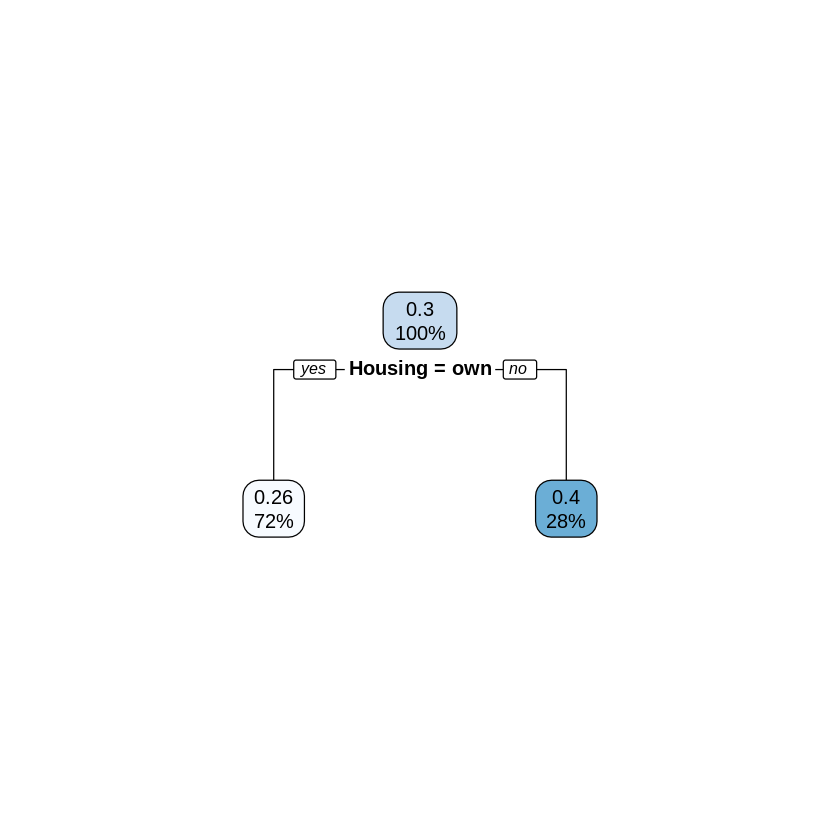

In [ ]:
rpart.plot(tree_housing, roundint = FALSE)

In [ ]:
DES$Moradia_C <- DES$Housing
DES$Moradia_C[DES$Moradia_C == "rent" | DES$Moradia_C=="free"] <- "Rent or Free"

In [ ]:
table(DES$Moradia_C, exclude = NULL)


         own Rent or Free 
         508          202 

## 05.5 Saving account
Conta poupança/títulos

1: 2: 3: 4: 5:

... < 100 DM 100 <=... < 500 DM 500 <= ... < 1000 DM

.. >= 1000 DM

desconhecido/sem conta poupança

In [ ]:
tree_saving_account= rpart(Default ~ Saving.accounts, data = DES, control = rpart.control(cp = 0.01,minbucket = 0.05*nrow(DES)))
tree_saving_account

n=583 (127 observations deleted due to missingness)

node), split, n, deviance, yval
      * denotes terminal node

1) root 583 129.444300 0.3327616  
  2) Saving.accounts=quite rich,rich 75   7.146667 0.1066667 *
  3) Saving.accounts=little,moderate 508 117.897600 0.3661417 *

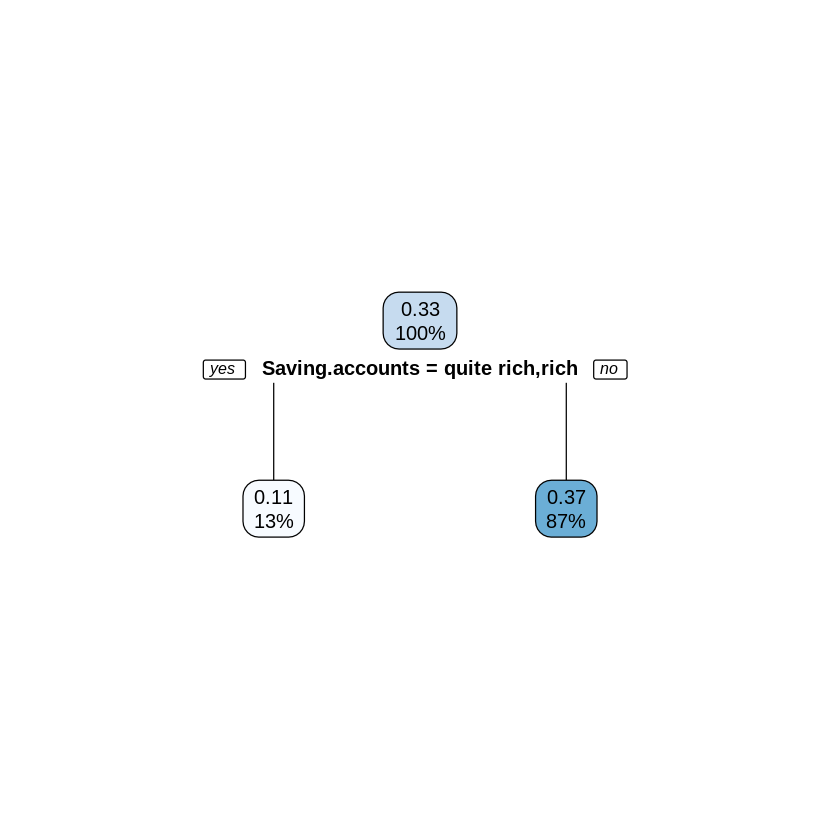

In [ ]:
rpart.plot(tree_saving_account, roundint = FALSE)

In [ ]:
table(DES$Saving.accounts, exclude = NULL)


    little   moderate quite rich       rich       <NA> 
       440         68         43         32        127 

In [ ]:
DES$POUPANCA_C <- DES$Saving.accounts

In [ ]:
#Transformando dados missing em Categoria NA.
DES$POUPANCA_C <- coalesce(DES$POUPANCA_C, "NA")


In [ ]:
table(DES$POUPANCA_C)


    little   moderate         NA quite rich       rich 
       440         68        127         43         32 

In [ ]:
tree_poupanca = rpart(Default ~ POUPANCA_C, data = DES, control = rpart.control(cp = 0.01,minbucket = 0.05*nrow(DES)))
tree_poupanca

n= 710 

node), split, n, deviance, yval
      * denotes terminal node

1) root 710 149.49860 0.3014085  
  2) POUPANCA_C=NA,quite rich,rich 202  24.11881 0.1386139 *
  3) POUPANCA_C=little,moderate 508 117.89760 0.3661417 *

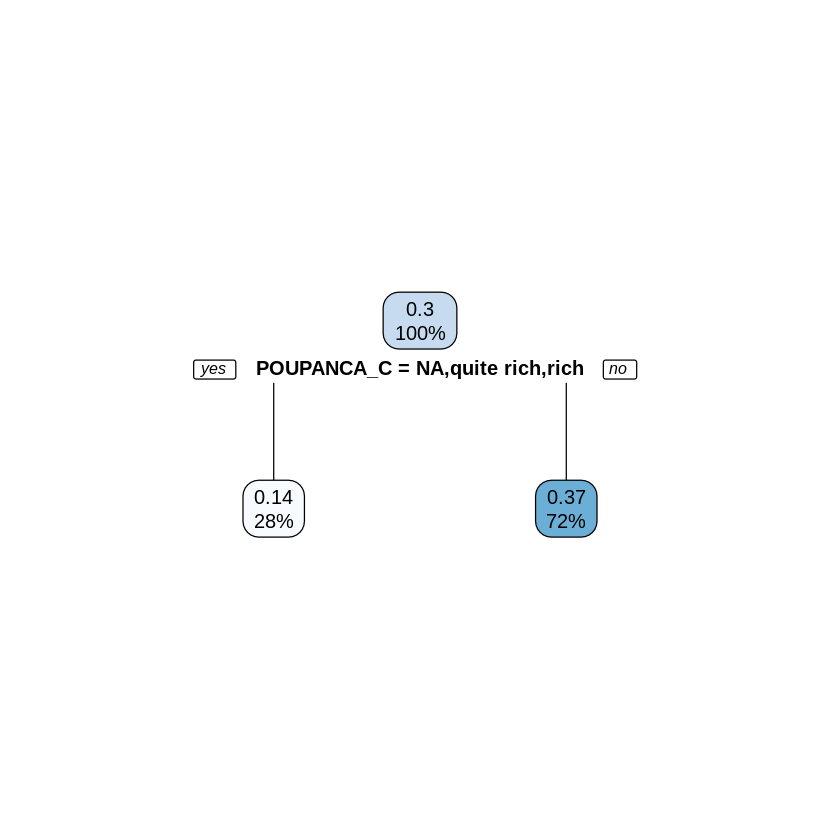

In [ ]:
rpart.plot(tree_poupanca, roundint = FALSE)

In [ ]:
#Criando categoria
DES$POUPANCA_C[DES$POUPANCA_C == "NA" | DES$POUPANCA_C=="quite rich" | DES$POUPANCA_C=="rich"] <- "Quite_rich or Rich or NA"

In [ ]:
DES$POUPANCA_C[DES$POUPANCA_C == "little" |  DES$POUPANCA_C=="moderate"] <- "Little or Moderate"
table(DES$POUPANCA_C)


      Little or Moderate Quite_rich or Rich or NA 
                     508                      202 

## 05.6 Checking.account (Dinheiro na conta corrente)
1: ... < 0 DM

2: 0<=...< 200DM

3: ... >= 200 DM/atribuições salariais por pelo menos 1 ano

4: sem conta corrente

In [ ]:
table(DES$Checking.account, exclude = NULL)
#Transformando NA em categoria
DES$ContaC_C <- coalesce(DES$Checking.account, "NA")



  little moderate     rich     <NA> 
     200      184       46      280 

In [ ]:
table(DES$ContaC_C)


  little moderate       NA     rich 
     200      184      280       46 

In [ ]:
tree_checking_account= rpart(Default ~ ContaC_C, data = DES, control = rpart.control(cp = 0.01,minbucket = 0.05*nrow(DES)))
tree_checking_account

n= 710 

node), split, n, deviance, yval
      * denotes terminal node

1) root 710 149.49860 0.3014085  
  2) ContaC_C=NA,rich 326  35.09202 0.1226994 *
  3) ContaC_C=little,moderate 384  95.15625 0.4531250  
    6) ContaC_C=moderate 184  43.60326 0.3858696 *
    7) ContaC_C=little 200  49.95500 0.5150000 *

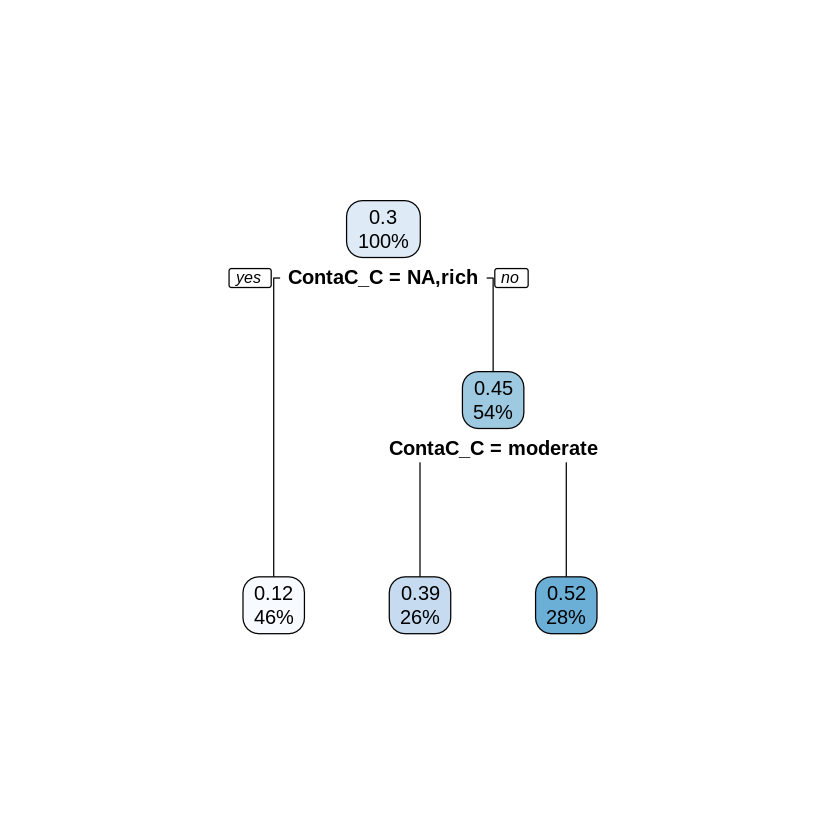

In [ ]:
rpart.plot(tree_checking_account, roundint =  FALSE)

In [ ]:
DES$ContaC_C[DES$ContaC_C == "NA" |  DES$ContaC_C=="rich"] <- "Rich or NA"
DES$ContaC_C[DES$ContaC_C == "moderate" |  DES$ContaC_C=="little"] <- "Moderate or Little"

In [ ]:
table(DES$ContaC_C)


Moderate or Little         Rich or NA 
               384                326 

## 05.7 Credit.amount

In [ ]:
tree_credit= rpart(Default ~ Credit.amount, data = DES, control = rpart.control(cp = 0.01,minbucket = 0.08*nrow(DES)))
tree_credit

n= 710 

node), split, n, deviance, yval
      * denotes terminal node

1) root 710 149.49860 0.3014085  
  2) Credit.amount< 7720.5 654 131.35170 0.2782875 *
  3) Credit.amount>=7720.5 56  13.71429 0.5714286 *

In [ ]:
rpart.plot(tree_credit, roundint = FALSE)

In [ ]:
DES$CREDITO <- as.numeric(DES$Credit.amount)

In [ ]:
str(DES$CREDITO)

 num [1:710] 1169 2096 7882 4870 2835 ...


In [ ]:
DES$CREDITO[as.numeric(DES$CREDITO) < 7721] <- "<7721"

In [ ]:
DES$CREDITO[as.numeric(DES$CREDITO) >= 7721] <- ">=7721"
# Foi preciso colocar como numérico, pois não tava reconhecendo como número as observações.

#OBS: Roda sempre o "<" e depois o ">="

Warning message in DES$CREDITO[as.numeric(DES$CREDITO) >= 7721] <- ">=7721":
“NAs introduced by coercion”


In [ ]:
table(DES$CREDITO, exclude = NULL)


 <7721 >=7721 
   654     56 

## 05.8 Duração de Parcelas (em meses)

In [ ]:
str(DES$Duration) #Verificando o tipo da variável

 int [1:710] 6 12 42 24 24 36 12 30 12 24 ...


In [ ]:
tree_parcelas = rpart(Default ~ Duration, data = DES, control = rpart.control(cp = 0.01,minbucket = 0.05*nrow(DES)))
tree_parcelas

n= 710 

node), split, n, deviance, yval
      * denotes terminal node

1) root 710 149.49860 0.3014085  
  2) Duration< 15.5 310  50.78710 0.2064516 *
  3) Duration>=15.5 400  93.75000 0.3750000  
    6) Duration< 43.5 354  80.56497 0.3502825 *
    7) Duration>=43.5 46  11.30435 0.5652174 *

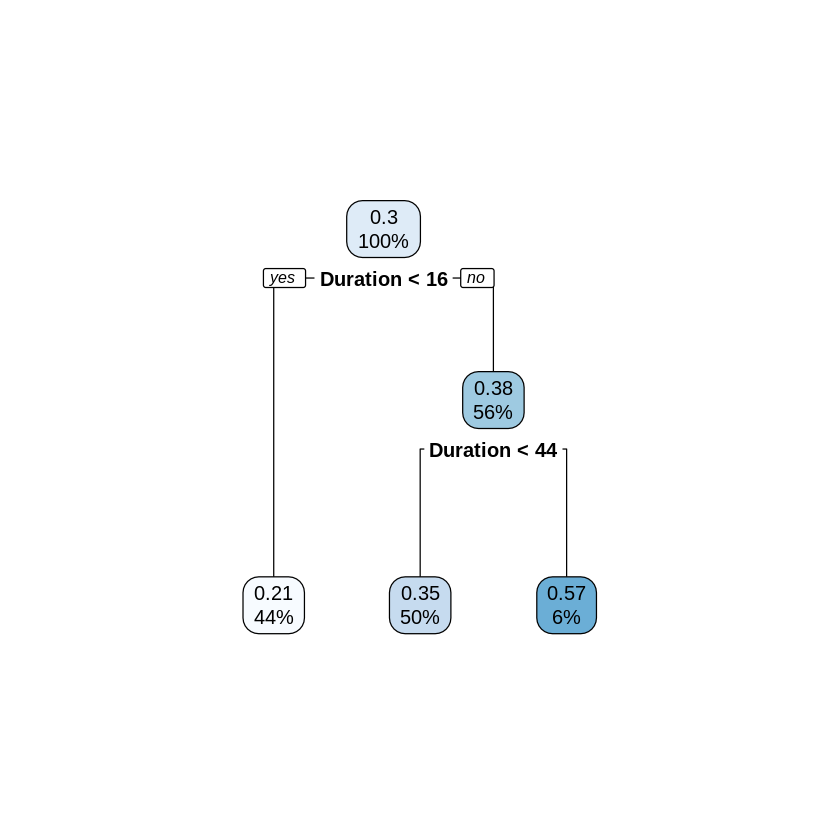

In [ ]:
rpart.plot(tree_parcelas, roundint = FALSE)

Menor que 16 parecelas - Probailidade de não pagar de 0.21

Entre 16 e 44 parcelas - Probabilidade de não pagar de 0.35

Maior que 44 parcelas - Probabilidade de não pagar de 0.57

## 05.9 Objetivo

In [ ]:
tree_objetivo= rpart(Default ~ Purpose, data = DES, control = rpart.control(cp = 0.005,minbucket = 0.04*nrow(DES)))
tree_objetivo

n= 710 

node), split, n, deviance, yval
      * denotes terminal node

1) root 710 149.49860 0.3014085  
  2) Purpose=radio/TV 198  33.66162 0.2171717 *
  3) Purpose=business,car,domestic appliances,education,furniture/equipment,repairs,vacation/others 512 113.88870 0.3339844  
    6) Purpose=business,car,domestic appliances,furniture/equipment,repairs 462 100.58870 0.3203463 *
    7) Purpose=education,vacation/others 50  12.42000 0.4600000 *

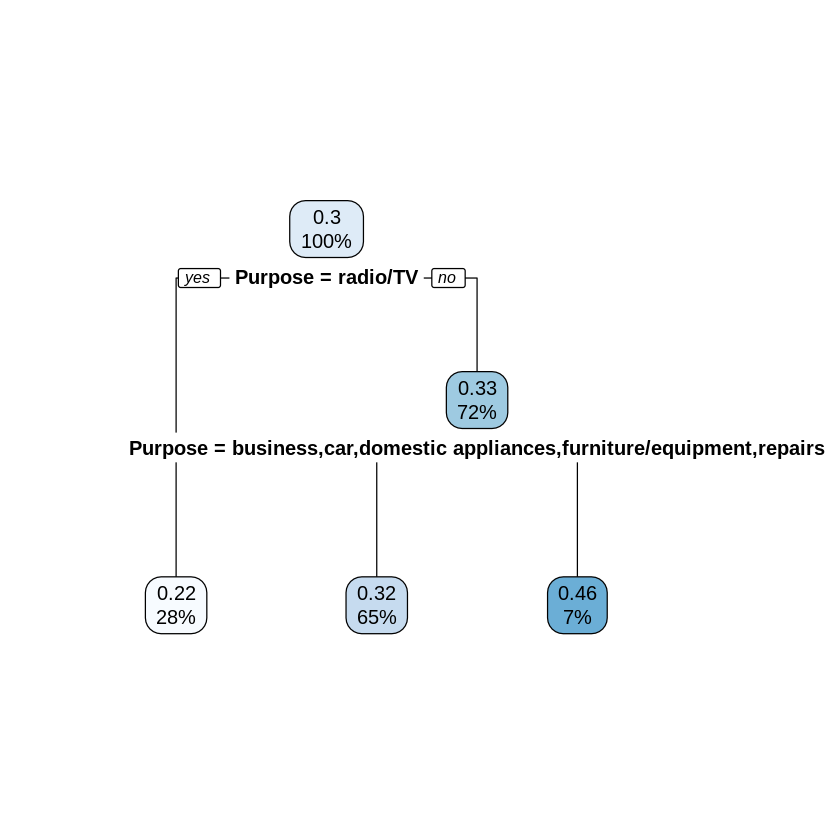

In [ ]:
rpart.plot(tree_objetivo, roundint = FALSE)

In [ ]:
database %>%
  tabyl(Purpose, Risk) %>%
  adorn_percentages() %>%
  adorn_pct_formatting()

Purpose,bad,good
<chr>,<chr>,<chr>
business,35.1%,64.9%
car,31.5%,68.5%
domestic appliances,33.3%,66.7%
education,39.0%,61.0%
furniture/equipment,32.0%,68.0%
radio/TV,22.1%,77.9%
repairs,36.4%,63.6%
vacation/others,41.7%,58.3%


In [ ]:
DES$Objetivo_C <- DES$Purpose
DES$Objetivo_C[DES$Objetivo_C == "vacation/others" |  DES$Objetivo_C=="education"] <- "V_or_E"
DES$Objetivo_C[DES$Objetivo_C == "business" |  DES$Objetivo_C=="car" |  DES$Objetivo_C=="domestic appliances" |  DES$Objetivo_C=="furniture/equipment" |  DES$Objetivo_C=="repairs"] <- "B_Car_DA_Fur_Re"
DES$Objetivo_C[DES$Objetivo_C == "radio/TV"] <- "radio_TV"

In [ ]:
table(DES$Objetivo_C)


B_Car_DA_Fur_Re        radio_TV          V_or_E 
            462             198              50 

In [ ]:
# Salvando base categorizada
# Select é para selecionar apenas a variáveis que quero compor a minha nova base

base_categorizada<- select(DES, c('Default','IDADE_C','GENERO_C','Moradia_C','POUPANCA_C','ContaC_C','CREDITO','Objetivo_C'))


ERROR: ignored

In [ ]:
write.csv(base_categorizada,"base_categorizada")

# 06. IV e CRAMMER V

## 06.1 Information Value

In [ ]:
# Criar uma tabela com os valores de IV
IV <- create_infotables(data=base_categorizada,
                   y="Default")
IV                   

$Tables
$Tables$IDADE_C
  IDADE_C   N   Percent        WOE         IV
1     <26 139 0.1957746  0.4471110 0.04218203
2    >=26 571 0.8042254 -0.1202526 0.05352709

$Tables$GENERO_C
  GENERO_C   N   Percent         WOE         IV
1   female 208 0.2929577  0.20461114 0.01273808
2     male 502 0.7070423 -0.08967706 0.01832093

$Tables$Moradia_C
     Moradia_C   N  Percent        WOE         IV
1 Rent or Free 202 0.284507  0.4392585 0.05910358
2          own 508 0.715493 -0.1959770 0.08547288

$Tables$POUPANCA_C
                POUPANCA_C   N  Percent        WOE         IV
1       Little or Moderate 508 0.715493  0.2917950 0.06418479
2 Quite_rich or Rich or NA 202 0.284507 -0.9862509 0.28112579

$Tables$ContaC_C
            ContaC_C   N   Percent        WOE        IV
1 Moderate or Little 384 0.5408451  0.6525477 0.2542959
2         Rich or NA 326 0.4591549 -1.1265124 0.6932944

$Tables$CREDITO
  CREDITO   N    Percent        WOE         IV
1   <7721 654 0.92112676 -0.1123724 0.01136597
2  >

In [ ]:
IV$Summary

,Variable,IV
,<chr>,<dbl>
5,ContaC_C,0.69329442
4,POUPANCA_C,0.28112579
6,CREDITO,0.12548675
7,Objetivo_C,0.09052639
3,Moradia_C,0.08547288
1,IDADE_C,0.05352709
2,GENERO_C,0.01832093



## 06.2 CrammerV

,Default,IDADE_C,GENERO_C,Moradia_C,POUPANCA_C,ContaC_C,CREDITO,Objetivo_C
Default,1.00000000,0.109102426,0.062768071,0.13684652,0.22371465,0.358839623,0.172191572,0.13754312
IDADE_C,0.10910243,1.000000000,0.298544115,0.16091385,0.03576848,0.155440321,0.000482242,0.09701419
GENERO_C,0.06276807,0.298544115,1.000000000,0.14282390,0.02865366,0.003078823,0.039101182,0.08154259
Moradia_C,0.13684652,0.160913854,0.142823900,1.00000000,0.01017385,0.098659188,0.081854061,0.13502364
POUPANCA_C,0.22371465,0.035768484,0.028653658,0.01017385,1.00000000,0.227087298,0.012364563,0.03919094
ContaC_C,0.35883962,0.155440321,0.003078823,0.09865919,0.22708730,1.000000000,0.070387694,0.10148385
CREDITO,0.17219157,0.000482242,0.039101182,0.08185406,0.01236456,0.070387694,1.000000000,0.13670465
Objetivo_C,0.13754312,0.097014191,0.081542591,0.13502364,0.03919094,0.101483846,0.136704649,1.00000000


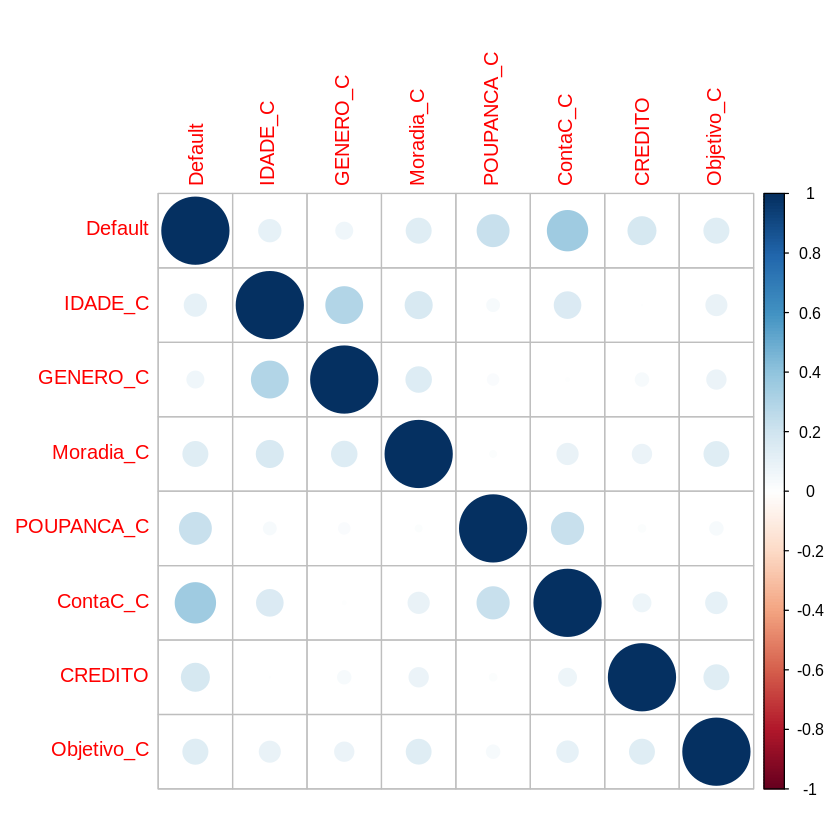

In [ ]:
# Matriz de associação de CrammerV (de 0 à 1)
m <- DescTools::PairApply(base_categorizada, DescTools::CramerV)
m

corrplot::corrplot(m)

# 07.DUMMY

In [ ]:
install.packages("mlr")
library("mlr")


In [ ]:
colnames(base_categorizada)

[1] "Default"    "IDADE_C"    "GENERO_C"   "Moradia_C"  "POUPANCA_C"
[6] "ContaC_C"   "CREDITO"    "Objetivo_C"

In [ ]:
IDADE=createDummyFeatures(base_categorizada$IDADE_C,cols=NULL)
GENERO=createDummyFeatures(base_categorizada$GENERO_C,cols=NULL)
Moradia=createDummyFeatures(base_categorizada$Moradia_C,cols=NULL)
POUPANCA=createDummyFeatures(base_categorizada$POUPANCA_C,cols=NULL)
CREDITO=createDummyFeatures(base_categorizada$CREDITO,cols=NULL)
Objetivo=createDummyFeatures(base_categorizada$Objetivo_C,cols=NULL)

BASE_DUMMY = cbind(base_categorizada$Default, IDADE,GENERO,Moradia,POUPANCA,CREDITO,Objetivo)


In [ ]:
BASE_DUMMY = cbind(base_categorizada$Default, IDADE,GENERO,Moradia,POUPANCA,CREDITO,Objetivo)


In [ ]:
write.csv(BASE_DUMMY,"BASE_DUMMY")

In [ ]:
colnames(BASE_DUMMY)[1]<-"RISK"

In [ ]:
View(BASE_DUMMY)

,RISK,<26,>=26,female,male,own,Rent or Free,Little or Moderate,Quite_rich or Rich or NA,<7721,>=7721,B_Car_DA_Fur_Re,radio_TV,V_or_E
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,1,1,0,0,1,1,0,0,1,0
2,0,0,1,0,1,1,0,1,0,1,0,0,0,1
3,0,0,1,0,1,0,1,1,0,0,1,1,0,0
4,1,0,1,0,1,0,1,1,0,1,0,1,0,0
5,0,0,1,0,1,1,0,0,1,1,0,1,0,0
6,0,0,1,0,1,0,1,1,0,1,0,1,0,0
7,0,0,1,0,1,1,0,0,1,1,0,0,1,0
8,1,0,1,0,1,1,0,1,0,1,0,1,0,0
9,0,1,0,1,0,1,0,1,0,1,0,0,1,0


#08. REGRESSAO LOGISTICA

In [ ]:
# Tentativa 1

modelo_log<- glm(formula = RISK ~ .,family = binomial(link = "logit"), data = BASE_DUMMY)
summary(modelo_log)




Call:
glm(formula = RISK ~ ., family = binomial(link = "logit"), data = BASE_DUMMY)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8369  -0.8393  -0.6052   1.0989   2.3157  

Coefficients: (5 not defined because of singularities)
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  0.1451     0.4548   0.319  0.74974    
`<26`                        0.5644     0.2129   2.651  0.00803 ** 
`>=26`                           NA         NA      NA       NA    
own                         -0.4854     0.1897  -2.558  0.01052 *  
`Rent or Free`                   NA         NA      NA       NA    
`Little or Moderate`         1.3375     0.2323   5.758 8.52e-09 ***
`Quite_rich or Rich or NA`       NA         NA      NA       NA    
`<7721`                     -1.2337     0.3052  -4.042 5.29e-05 ***
`>=7721`                         NA         NA      NA       NA    
B_Car_DA_Fur_Re             -0.6258     0.3243  -1.930  0.05366 .

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


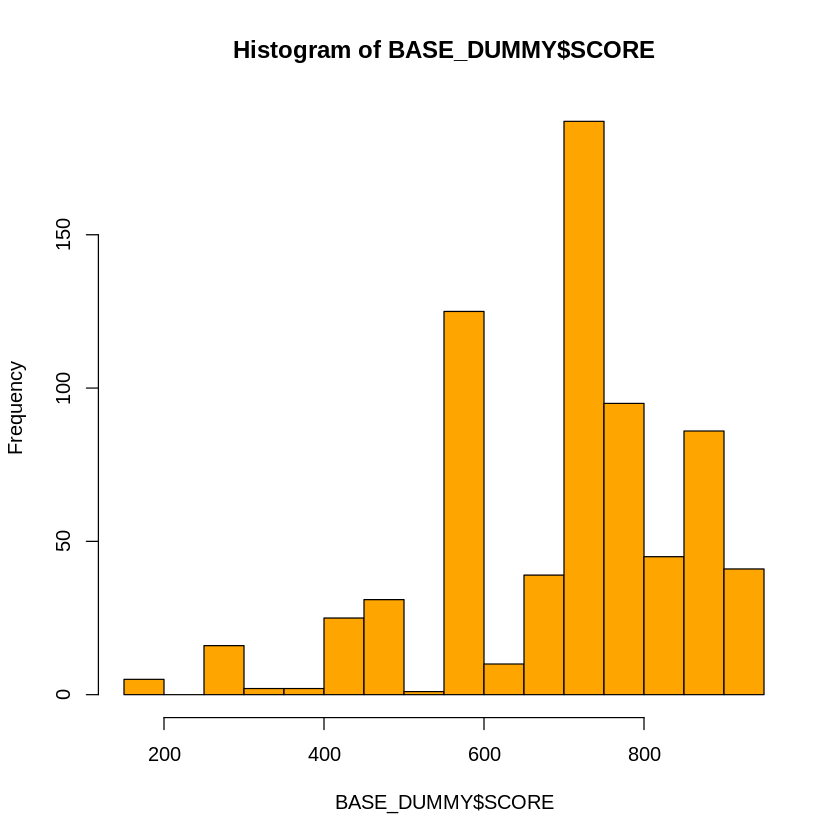

In [ ]:
BASE_DUMMY$logit <- predict(modelo_log, newdata = BASE_DUMMY, type = "link")

BASE_DUMMY$PROBABILIDADE= (((exp(BASE_DUMMY$logit))/(1+exp(BASE_DUMMY$logit))))
BASE_DUMMY$SCORE=round((1000*(1-BASE_DUMMY$PROBABILIDADE)))

hist(BASE_DUMMY$SCORE, col = "Orange")


In [ ]:
quantile(BASE_DUMMY$SCORE, probs = seq(0, 1, 1/6))  

0% 16.66667% 33.33333%       50% 66.66667% 83.33333%      100% 
      173       574       670       703       781       893       932

In [ ]:
BASE_DUMMY$SCORE=as.integer(BASE_DUMMY$SCORE)

In [ ]:

##APLICANDO REGRA

BASE_DUMMY$FAIXAS=BASE_DUMMY$SCORE
BASE_DUMMY$FAIXAS[BASE_DUMMY$FAIXAS >=0 & BASE_DUMMY$FAIXAS < 574 ]<-"1"
BASE_DUMMY$FAIXAS[BASE_DUMMY$FAIXAS >= 574 & BASE_DUMMY$FAIXAS < 670 ]<-"2"
BASE_DUMMY$FAIXAS[BASE_DUMMY$FAIXAS >= 670 & BASE_DUMMY$FAIXAS < 703  ]<-"3"
BASE_DUMMY$FAIXAS[BASE_DUMMY$FAIXAS >= 703 & BASE_DUMMY$FAIXAS < 703.1 ]<-"4"
BASE_DUMMY$FAIXAS[BASE_DUMMY$FAIXAS >= 703.1 & BASE_DUMMY$FAIXAS < 893 ]<-"5"
BASE_DUMMY$FAIXAS[BASE_DUMMY$FAIXAS >=893 ]<-"8"
table(BASE_DUMMY$FAIXAS)


  1   2   3   4   5   8 
113 104  39 181 153 120 

In [ ]:
table(BASE_DUMMY$FAIXAS,BASE_DUMMY$RISK)

   
      0   1
  1  49  64
  2  58  46
  3  26  13
  4 129  52
  5 128  25
  8 106  14

# 09. SCORING

In [ ]:
# VALIDACAO

#Transformando dados missing em Categoria NA.
VAL$POUPANCA_C <- coalesce(VAL$Saving.accounts, "NA")
VAL$POUPANCA_C[VAL$POUPANCA_C == "NA" | VAL$POUPANCA_C=="quite rich" | VAL$POUPANCA_C=="rich"] <- "Quite_rich or Rich or NA"
VAL$POUPANCA_C[VAL$POUPANCA_C == "little" |  VAL$POUPANCA_C=="moderate"] <- "Little or Moderate"

VAL$Objetivo_C=VAL$Purpose
VAL$Objetivo_C[VAL$Objetivo_C == "vacation/others" |  VAL$Objetivo_C=="education"] <- "V_or_E"
VAL$Objetivo_C[VAL$Objetivo_C == "business" |  VAL$Objetivo_C=="car" |  VAL$Objetivo_C=="domestic appliances" |  VAL$Objetivo_C=="furniture/equipment" |  VAL$Objetivo_C=="repairs"] <- "B_Car_DA_Fur_Re"
VAL$Objetivo_C[VAL$Objetivo_C == "radio/TV"] <- "radio_TV"

VAL$CREDITO=VAL$Credit.amount
VAL$CREDITO[as.numeric(VAL$CREDITO) < 7721] <- "<7721"
VAL$CREDITO[as.numeric(VAL$CREDITO) >= 7721] <- ">=7721"

VAL$Moradia_C=VAL$Housing
VAL$Moradia_C[VAL$Moradia_C == "rent" | VAL$Moradia_C=="free"] <- "Rent or Free"

VAL$IDADE_C=VAL$Age
VAL$IDADE_C[VAL$IDADE_C <26]<-"<26" 
VAL$IDADE_C[VAL$IDADE_C >=26]<-">=26" 


   
   
 


Warning message in VAL$CREDITO[as.numeric(VAL$CREDITO) >= 7721] <- ">=7721":
“NAs introduced by coercion”


In [ ]:
VAL_CATEGORIZADA=select(VAL,c(Default,POUPANCA_C,Objetivo_C,CREDITO,Moradia_C,IDADE_C))



In [ ]:
IDADE2=createDummyFeatures(VAL_CATEGORIZADA$IDADE_C,cols=NULL)
Moradia2=createDummyFeatures(VAL_CATEGORIZADA$Moradia_C,cols=NULL)
POUPANCA2=createDummyFeatures(VAL_CATEGORIZADA$POUPANCA_C,cols=NULL)
CREDITO2=createDummyFeatures(VAL_CATEGORIZADA$CREDITO,cols=NULL)
Objetivo2=createDummyFeatures(VAL_CATEGORIZADA$Objetivo_C,cols=NULL)



In [ ]:
#BASE_DUMMY_VAL = cbind(VAL$Default,IDADE2,Moradia2,POUPANCA2,CREDITO2,Objetivo2)
write.csv(BASE_DUMMY_VAL,"BASE_DUMMY_VAL")


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


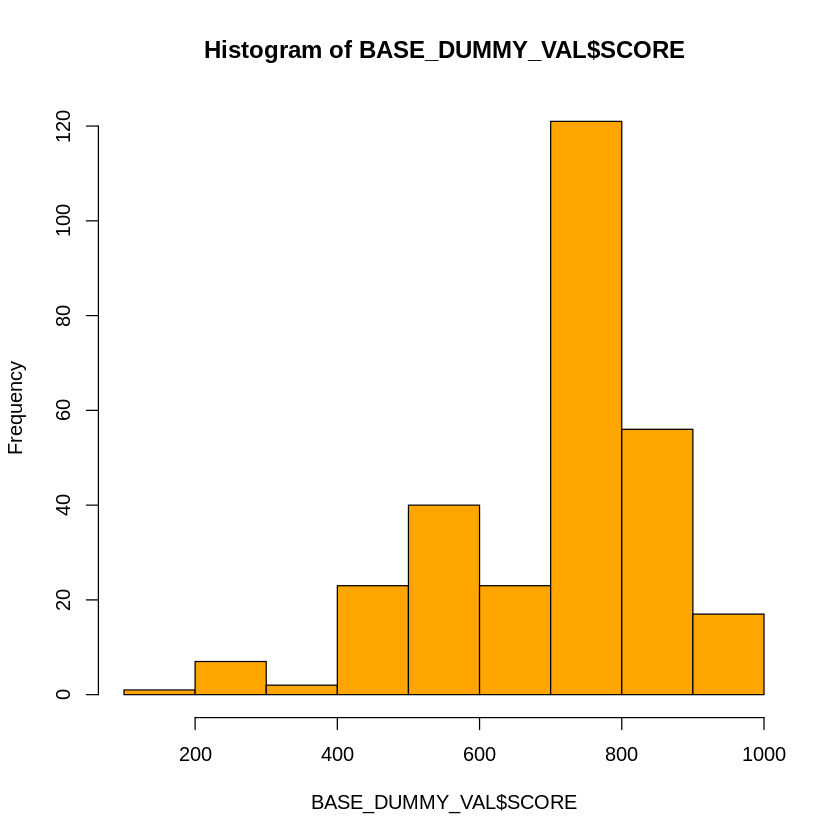

In [ ]:
BASE_DUMMY_VAL$logit <- predict(modelo_log, newdata = BASE_DUMMY_VAL, type = "link")

BASE_DUMMY_VAL$PROBABILIDADE= (((exp(BASE_DUMMY_VAL$logit))/(1+exp(BASE_DUMMY_VAL$logit))))
BASE_DUMMY_VAL$SCORE=round((1000*(1-BASE_DUMMY_VAL$PROBABILIDADE)))

hist(BASE_DUMMY_VAL$SCORE, col = "Orange")
#View(BASE_DUMMY_VAL)

In [ ]:
##APLICANDO REGRA

BASE_DUMMY_VAL$FAIXAS=BASE_DUMMY_VAL$SCORE
BASE_DUMMY_VAL$FAIXAS[BASE_DUMMY_VAL$FAIXAS >=0 & BASE_DUMMY_VAL$FAIXAS < 574 ]<-"1"
BASE_DUMMY_VAL$FAIXAS[BASE_DUMMY_VAL$FAIXAS >= 574 & BASE_DUMMY_VAL$FAIXAS < 670 ]<-"2"
BASE_DUMMY_VAL$FAIXAS[BASE_DUMMY_VAL$FAIXAS >= 670 & BASE_DUMMY_VAL$FAIXAS < 703  ]<-"3"
BASE_DUMMY_VAL$FAIXAS[BASE_DUMMY_VAL$FAIXAS >= 703 & BASE_DUMMY_VAL$FAIXAS < 703.1 ]<-"4"
BASE_DUMMY_VAL$FAIXAS[BASE_DUMMY_VAL$FAIXAS >= 703.1 & BASE_DUMMY_VAL$FAIXAS < 893 ]<-"5"
BASE_DUMMY_VAL$FAIXAS[BASE_DUMMY_VAL$FAIXAS >=893 ]<-"8"
table(BASE_DUMMY_VAL$FAIXAS)


 1  2  3  4  5  8 
40 37 19 72 69 53 

In [ ]:
colnames(BASE_DUMMY_VAL)[1]<-"Default"	

In [ ]:
table(BASE_DUMMY_VAL$FAIXAS,BASE_DUMMY_VAL$Default)

   
     0  1
  1 21 19
  2 22 15
  3 13  6
  4 53 19
  5 50 19
  8 45  8

In [ ]:
View(BASE_DUMMY_VAL)

,Default,<26,>=26,own,Rent or Free,Little or Moderate,Quite_rich or Rich or NA,<7721,>=7721,B_Car_DA_Fur_Re,radio_TV,V_or_E,logit,PROBABILIDADE,SCORE,FAIXAS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,1,0,1,0,1,0,1,0,0,1,0,-0.7083559,0.32996224,670,3
2,0,0,1,0,1,0,1,0,1,0,0,1,0.1450776,0.53620591,464,1
3,1,1,0,0,1,1,0,1,0,1,0,0,0.1874888,0.54673537,453,1
4,1,1,0,0,1,1,0,1,0,1,0,0,0.1874888,0.54673537,453,1
5,1,0,1,1,0,1,0,1,0,0,1,0,-1.2727739,0.21878278,781,5
6,1,0,1,0,1,1,0,0,1,1,0,0,0.8567209,0.70197511,298,1
7,0,0,1,1,0,0,1,1,0,0,1,0,-2.6102337,0.06848270,932,8
8,0,0,1,1,0,1,0,1,0,1,0,0,-0.8623098,0.29685699,703,4
9,0,0,1,0,1,1,0,1,0,1,0,0,-0.3769292,0.40686774,593,2
